In [301]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

# Homework - Nesterov and RMSprop gradient descent for regression

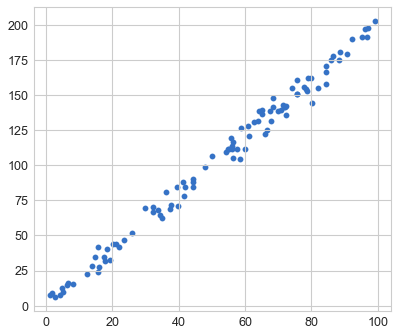

In [302]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [303]:
EPOCHS = 10

In [304]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))

In [305]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X)) 


In [306]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

Vanilla gradiend descent

In [307]:

theta0 = 1
theta1 = 1

LEARNING_RATE = 0.0001

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 -= LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
   
    
    print("t0:", theta0, "t1:", theta1, "cost:", 
          cost_function(X, Y, theta0, theta1))

t0: 1.005151436675696 t1: 1.3431223770271037 cost: 737.4481030957552
t0: 1.0085138851266557 t1: 1.5671341217084038 cost: 322.6410368866348
t0: 1.0107083702643263 t1: 1.71338300089345 cost: 145.83805040125918
t0: 1.012140335966449 t1: 1.8088634211163916 cost: 70.47941121054708
t0: 1.0130744813376291 t1: 1.871199018177981 cost: 38.359340072892884
t0: 1.0136836184976827 t1: 1.9118956030485257 cost: 24.668819887431855
t0: 1.0140805699995983 t1: 1.9384648882702704 cost: 18.833517013578515
t0: 1.0143389934576468 t1: 1.9558109892908724 cost: 16.346339070856562
t0: 1.0145069771662016 t1: 1.9671356191935592 cost: 15.28623056616318
t0: 1.0146159161694637 t1: 1.9745290563938218 cost: 14.834381078933994


Nesterov gradiend descent

In [309]:
gamma = 0.6
theta0_nm = 1
theta1_nm = 1
lr = 0.0005
etha = (1-gamma)*lr
v_0 = 0
v_1 = 0
for _ in range(EPOCHS):
    
    v_0_t = gamma*v_0
    v_1_t = gamma*v_1
   
    v_0 = v_0_t + etha*der_theta0(X, Y, theta0_nm - v_0_t, theta1_nm - v_1_t)
    v_1 = v_1_t + etha*der_theta1(X, Y, theta0_nm - v_0_t, theta1_nm - v_1_t)

    theta0_nm -= v_0
    theta1_nm -= v_1
    
   
    
    print("t0:", theta0_nm, "t1:", theta1_nm, "cost:", 
          cost_function(X, Y, theta0_nm, theta1_nm))

t0: 1.0103028733513917 t1: 1.6862447540542074 cost: 173.03416131892232
t0: 1.0153379460753071 t1: 2.0219283135277957 cost: 16.446409548045406
t0: 1.0159052609272399 t1: 2.0602500637406975 cost: 23.45267377050674
t0: 1.0152527948796994 t1: 2.0174195122721974 cost: 15.957308909564201
t0: 1.0148228254003364 t1: 1.9894390703143814 cost: 14.500474557436684
t0: 1.0147252160140308 t1: 1.9836088841389334 cost: 14.539144347459448
t0: 1.0147492344377378 t1: 1.98588968941098 cost: 14.509963002803865
t0: 1.014771700681215 t1: 1.988074936307621 cost: 14.498945112966112
t0: 1.0147710484771104 t1: 1.988725600855787 cost: 14.498867237710497
t0: 1.0147593436614373 t1: 1.9886431382727408 cost: 14.498795425562864


После подбора  параметров лосс спускается до уровня флуктуаций за 3-4 эпохи, это быстрее, чем обычный градиентный спуск

RMSprop gradiend descent

In [310]:
theta0 = 1
theta1 = 1

LEARNING_RATE = 0.5

G0 = 0
G1 = 0
eps = 10e-6
beta = 0.8

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    G0 += beta*G0 +  (1-beta)*dt0**2
    dt1 = der_theta1(X, Y, theta0, theta1)
    G1 += beta*G1 +  (1-beta)*dt1**2
    
    theta0 -= LEARNING_RATE * dt0 / np.sqrt(G0 + eps)
    theta1 -= LEARNING_RATE * dt1 / np.sqrt(G1 + eps)
    
   
    
    print("t0:", theta0, "t1:", theta1, "cost:", 
          cost_function(X, Y, theta0, theta1))

t0: 2.11803397821723 t1: 2.118033988747521 cost: 51.72923510783925
t0: 1.9913901705943737 t1: 1.9955704923450421 cost: 15.447781840211642
t0: 1.9749841797951293 t1: 1.9819559182419988 cost: 14.728522325181636
t0: 1.9692382707740987 t1: 1.9782594432738785 cost: 14.647768400988953
t0: 1.9662759416980815 t1: 1.9768165117048464 cost: 14.629460003957893
t0: 1.964455697016545 t1: 1.976125611576861 cost: 14.623280442057919
t0: 1.9632388339660525 t1: 1.975749066732718 cost: 14.620597282479771
t0: 1.9623892745982299 t1: 1.9755251219589505 cost: 14.619220990300722
t0: 1.9617817700432076 t1: 1.9753835470193826 cost: 14.61843104997642
t0: 1.9613411898739062 t1: 1.975290049727397 cost: 14.617941499651726


После подбора  параметров лосс спускается до уровня флуктуаций всего за 2-3 эпохи, это быстрее, чем обычный градиентный спуск и чуть быстрее того, что получилось у нестеровского спуска (хотя возможно это лишь вопрос подбора параметров)

## Vector's approach
Все то же самое проделаем, используя numpy и нарисуем картинки

Vanilla gradiend descent

In [311]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)    

In [312]:
params

array([-1.19857789,  2.00830561])

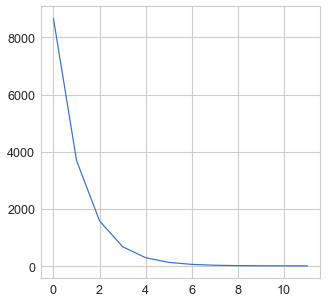

In [313]:
plt.figure(figsize=(5,5))
plt.plot(costs)
plt.show()

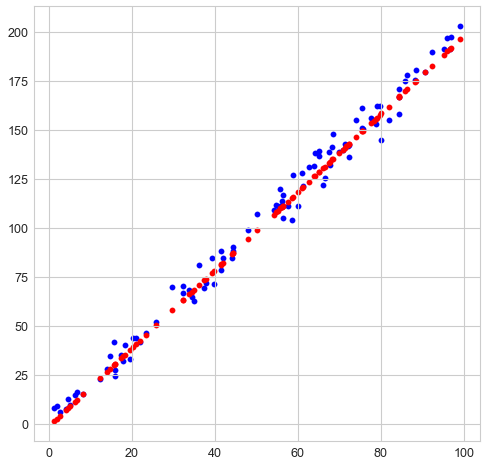

In [314]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

Nesterov gradiend descent

In [315]:
EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

gamma = 0.6
lr = 0.0007
etha = (1-gamma)*lr
v = np.zeros((2,))

for _ in range(EPOCHS):
        
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    v_t = gamma*v
    
    v[0] = v_t[0] + etha*np.sum((params[0]-v_t[0]) + (params[1]-v_t[1]) * X - Y) / len(predictions)
    v[1] = v_t[1] + etha*np.sum(((params[0]-v_t[0]) + (params[1]-v_t[1]) * X - Y) * X) / len(predictions)

    
    params[0] -= v[0]
    params[1] -= v[1]

In [316]:
params

array([0.70727667, 1.99305309])

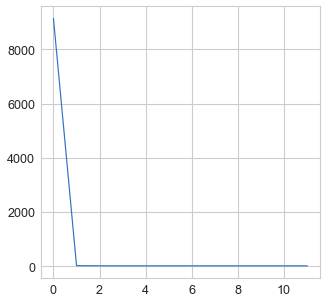

In [317]:
plt.figure(figsize=(5,5))
plt.plot(costs)
plt.show()

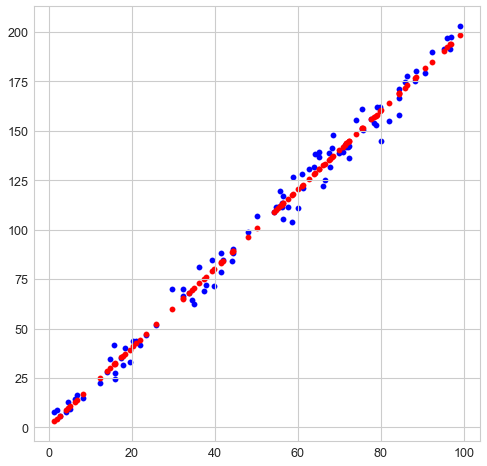

In [318]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [319]:
params

array([0.70727667, 1.99305309])

RMSprop gradiend descent

In [320]:
# h(xi) = params[0] + params[1] * xi

EPOCHS = 12
LEARNING_RATE = 0.4

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))
G = np.zeros((2,))
eps = 10e-6

beta = 0.8

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    G[0] = beta*G[0] + (1-beta)*(np.sum(predictions - Y) / len(predictions))**2
    G[1] = beta*G[1] + (1-beta)*(np.sum((predictions - Y) * X) / len(predictions))**2
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions) / np.sqrt(G[0]+eps)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions) / np.sqrt(G[1]+eps)   

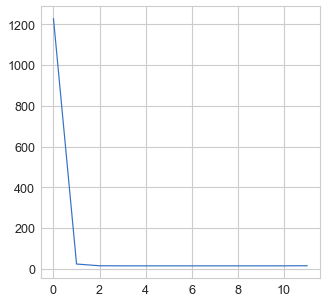

In [321]:
plt.figure(figsize=(5,5))
plt.plot(costs)
plt.show()

In [322]:
params

array([1.5063194 , 1.93269139])

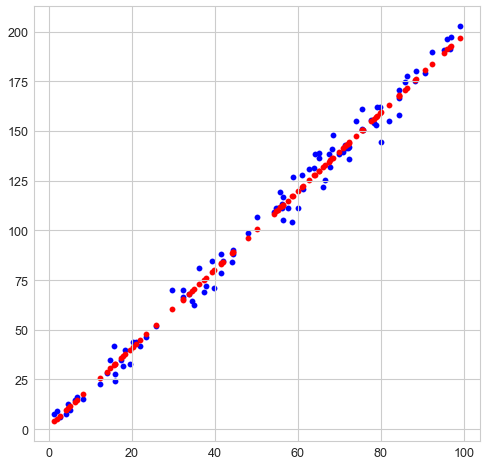

In [323]:
plt.figure(figsize=(8,8))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()